In [2]:
import pandas as pd
boston = pd.read_csv('train.csv')
boston.describe()

import matplotlib.pyplot as plt
%matplotlib notebook
boston.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [3]:
#measures of centrality for 3 variables

print(boston['medv'].mean())
print(boston['crim'].mean())
print(boston['nox'].mean())

22.768768768768783
3.360341471471471
0.557144144144145


In [4]:
#measures of dispersion for 3 variables

print(boston['medv'].std())
print(boston['crim'].std())
print(boston['nox'].std())

9.17346802731542
7.3522718367811075
0.11495450830289299


Text(0, 0.5, 'Number of houses')

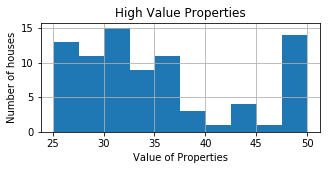

In [5]:
#insightful subsets of data for 3 possible 2-way splits
#1
#subset for median property values
#I divived the dataframe into two subsets based on the median value of properties. 
#The first subset contains locations with properties with value of 75th percentile and above. 
#The second subset contains data about properties up to Q3.
highvalue = boston.loc[boston['medv']>25]
lowervalue = boston.loc[boston['medv']<=25]

hist1 = plt.figure(figsize=(5,2))
hist1 = highvalue.medv.hist()
plt.title('High Value Properties')
plt.xlabel('Value of Properties')
plt.ylabel('Number of houses')

Text(0, 0.5, 'Number of houses')

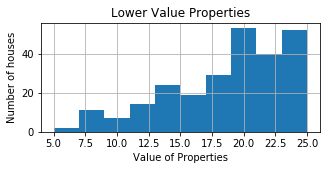

In [6]:
hist2 = plt.figure(figsize=(5,2))
hist2= lowervalue.medv.hist()
plt.title('Lower Value Properties')
plt.xlabel('Value of Properties')
plt.ylabel('Number of houses')

In [17]:
#EXPERIMENT
highvalue['crim'].describe()

count    82.000000
mean      0.794500
std       2.073004
min       0.009060
25%       0.048250
50%       0.090855
75%       0.520470
max      11.951100
Name: crim, dtype: float64

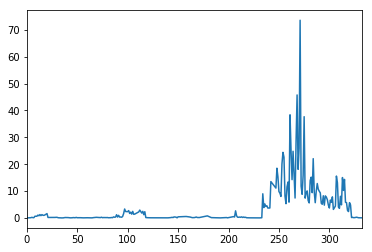

In [14]:
lowervalue['crim'].plot()

In [8]:
#2 Criminality
# The original dataframe shows a huge disparity of crime rate. The mean is 3.3 and the median is 0.26.
# I created two subsets based on per capita crime rate.
# First subset shows locations with crime rate lower than 10 and contains 300 out of 333 location.
# The median of this subset is 0.2 - very close to the general median!
# The second subset shows the remaining 33 locations. The median crime rate per capita in this subset is 15.
crime_high= boston.loc[boston['crim']>=10]
crime_low = boston.loc[boston['crim']<10]


Text(0, 0.5, 'Number of houses')

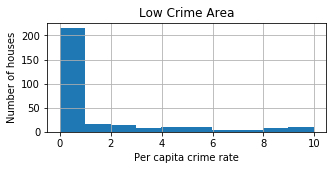

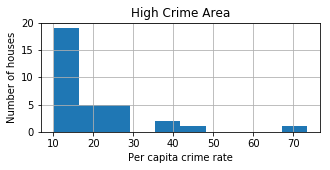

In [9]:
hist3 = plt.figure(figsize=(5,2))
hist3 = crime_low.crim.hist()
plt.title('Low Crime Area')
plt.xlabel('Per capita crime rate')
plt.ylabel('Number of houses')

hist4 = plt.figure(figsize=(5,2))
hist4 = crime_high.crim.hist()
plt.title('High Crime Area')
plt.xlabel('Per capita crime rate')
plt.ylabel('Number of houses')


In [53]:
#3 NO3
# The two subsets divide the data based on the median value of levels of NO3.
# First data set shows locations with lower levels of NO3 than median. The second subset the rest.
# Large difference between those datasets can be observed on the proportion of non-retail business acres per town.
# Mean indus in 1st subset:6
# Mean indus in 2nd subset:17
nox_low = boston.loc[boston['nox']<0.538]
nox_high= boston.loc[boston['nox']>=0.538]

<IPython.core.display.Javascript object>


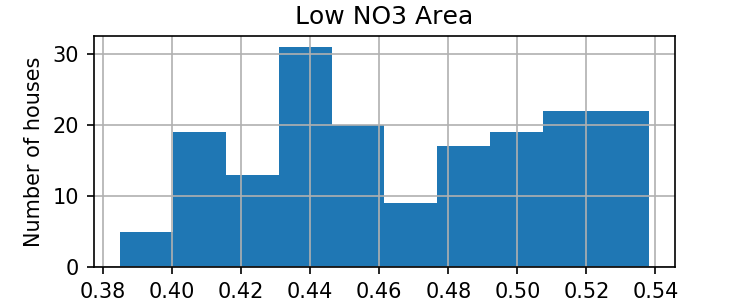

<IPython.core.display.Javascript object>


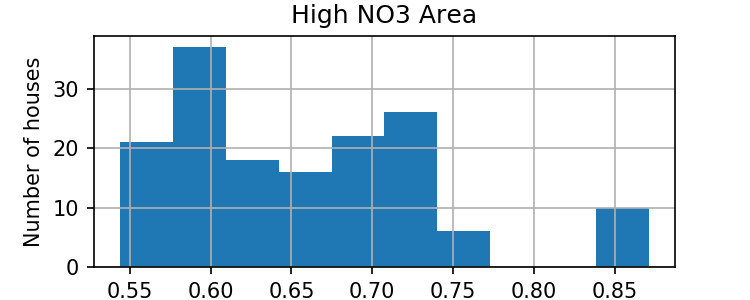

Text(0, 0.5, 'Number of houses')

In [56]:
hist5 = plt.figure(figsize=(5,2))
hist5 = nox_low.nox.hist()
plt.title('Low NO3 Area')
plt.xlabel('NO3 concentration')
plt.ylabel('Number of houses')

hist6 = plt.figure(figsize=(5,2))
hist6 = nox_high.nox.hist()
plt.title('High NO3 Area')
plt.xlabel('NO3 concentration')
plt.ylabel('Number of houses')

<IPython.core.display.Javascript object>


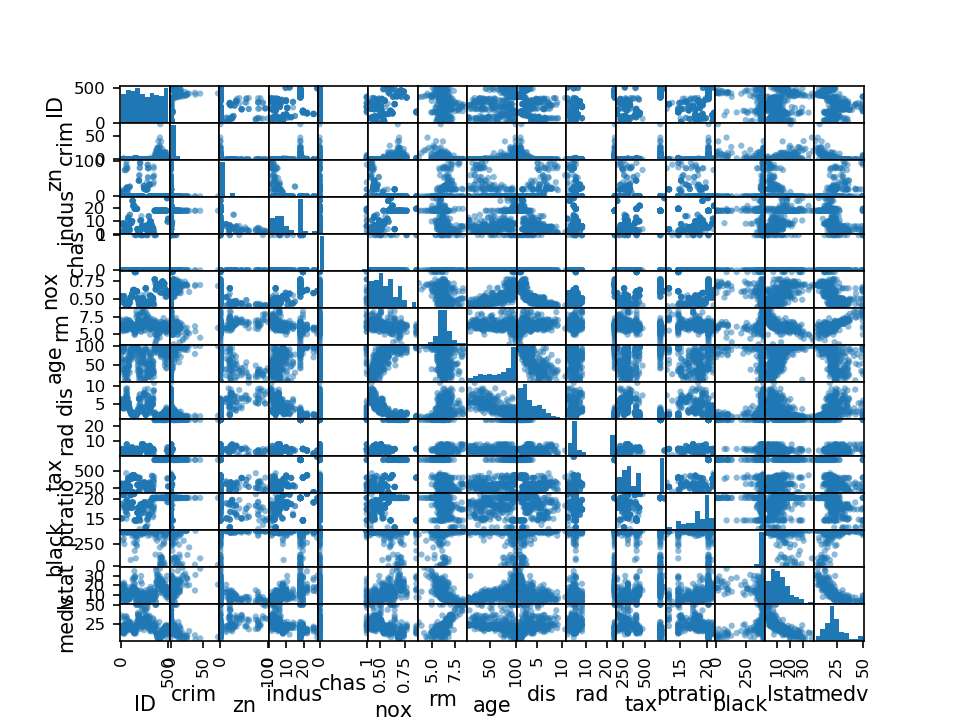

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000006F66EC02B0>,
      dtype=object)

In [68]:
pd.plotting.scatter_matrix(boston)